### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# data shape will show us how many total rows are in the data set
data.shape

(12684, 26)

In [5]:
# data info will show us for each column, how many non null values there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**Based on the info and shape, there 6 columns that will need to be cleaned due to null values.**

In [6]:
# for each column that has any null values, print the column name, value counts of that column, and the null value count of the column
for column in data.columns:
    if data[column].isnull().any():
        value_counts = data[column].value_counts()
        null_count = data[column].isnull().sum()
        
        # Print the column name, value counts, and null value count
        print(f"Column Name: {column}")
        print("Value Counts:")
        print(value_counts)
        print(f"Null Value Count: {null_count}")
        print("\n")

Column Name: car
Value Counts:
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
Null Value Count: 12576


Column Name: Bar
Value Counts:
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
Null Value Count: 107


Column Name: CoffeeHouse
Value Counts:
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
Null Value Count: 217


Column Name: CarryAway
Value Counts:
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
Null Value Count: 151


Column Name: RestaurantLessThan20
Value Counts:
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64
Null Value Count: 130


Column Name: Restaurant20T

**From the previous output, we can see that for columns 'Bar, 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', the values need to be cleaned up. The value 'never' is the same as 'less1'. Additionally, the values will be more useful as ints.**

In [7]:
# of the columns that have null values, check how many rows have a null value for all those columns
columns_with_null = data.columns[data.isnull().any()]
filtered_data = data[data[columns_with_null].isnull().all(axis=1)]
null_rows_count = len(filtered_data)
print(f"Rows with All-Null Values in Those Columns: {null_rows_count}")

Rows with All-Null Values in Those Columns: 42


In the worst case, 217 - 42 = 175 extra rows with proper values in some of the columns will be dropped. This is a small proportion of the overall data set (~1.39% of the data set).
**Based on the two computations above, we should drop the car column. Afterwards, we should drop the rows that have any null values.**

In [8]:
# check how many rows in data are duplicated
duplicates = data.duplicated()
duplicate_row_count = duplicates.sum()
print(f"Duplicate Row Count: {duplicate_row_count}")

Duplicate Row Count: 74


**Based on the above computation, there are 74 total rows that are duplicated and should be removed.**

In [9]:
# check value counts of age
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

Need to fix mapping of age column so that it can be represented as ints for easier use in computations and analytics

In [10]:
# check value counts of income
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

Need to fix mapping of income column so that it can be represented as ints for easier use in computations and analytics

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
def cleanData(data):
    # drop the car column
    cleaned_data = data.drop(columns=['car'])
    
    # drop rows with null values
    cleaned_data = cleaned_data.dropna()
    
    # drop the duplicated rows
    cleaned_data = cleaned_data.drop_duplicates()
    
    # map the columns listed in the previous statement to relevant ints
    num_of_times_mapping = {
        'never': 0,
        'less1': 0, # less than 1 is still 0, which is never
        '1~3': 3,
        '4~8': 8,
        'gt8': 9  # Assuming this represents more than 8 times
    }

    cols_to_map = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

    for col in cols_to_map:
        cleaned_data[col] = cleaned_data[col].map(num_of_times_mapping)
        
    age_mapping = {
        'below21': 0,
        '21': 21,
        '26': 26,
        '31': 31,
        '36': 36,
        '41': 41,
        '46': 46,
        '50plus': 50 
    }
    
    # age column should be mapped to int values
    cleaned_data['age'] = cleaned_data['age'].map(age_mapping)
    
    income_mapping = {
        'Less than $12500': 12500,
        '$12500 - $24999': 24999,
        '$25000 - $37499': 37499,
        '$37500 - $49999': 49999,
        '$50000 - $62499': 62499,
        '$62500 - $74999': 74999,
        '$75000 - $87499': 87499,
        '$87500 - $99999': 99999,
        '$100000 or More': 100000
    }
    
    # income column should be mapped to int values
    cleaned_data['income'] = cleaned_data['income'].map(income_mapping)
    
    return cleaned_data

In [12]:
# call the method to clean the data set 
cleaned_data = cleanData(data)

In [13]:
# display shape of the cleaned data
cleaned_data.shape

(12007, 25)

In [14]:
# check info to ensure no null/missing values are in cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  int64 
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  int64 
 14  Bar                   12007 non-null  int64 
 15  CoffeeHouse           12007 non-nul

In [15]:
# check the head of the cleaned data to see that the values in specific columns were mapped correctly
cleaned_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,0,8,8,0,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,0,8,8,0,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,8,8,0,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,0,8,8,0,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,0,8,8,0,1,0,0,0,1,0


Now, with the data cleaned, we can continue with the rest of the analysis. 

4. What proportion of the total observations chose to accept the coupon? 



In [16]:
# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
cleaned_data['Y'].mean()

0.5684184225868244

The proportion of the total observations that had people choose to accept the coupon was **0.568**. 

**Assign all the seaborn palletes to a variable so we can select one each time we plot**

In [17]:
available_palettes = [
    "deep", "muted", "pastel", "dark", "colorblind", "husl",
    "Set1", "Set2", "Set3", "viridis", "plasma", "cubehelix", "rocket", "icefire", "mako"
]

5. Use a bar plot to visualize the `coupon` column.

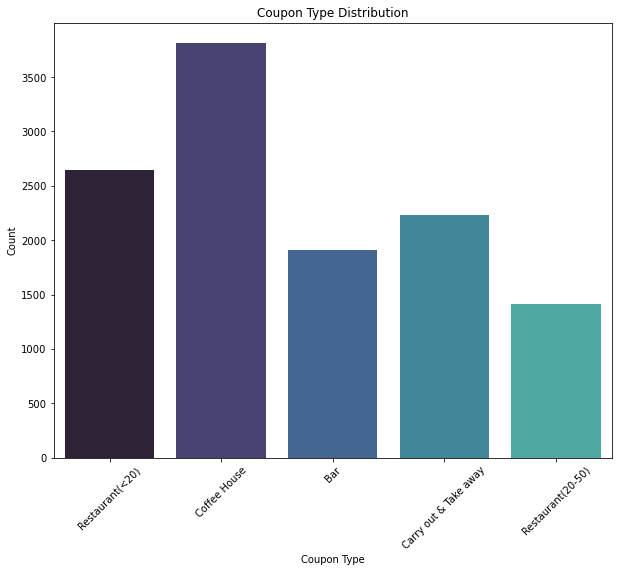

In [18]:
plt.figure(figsize=(10, 8))

selected_palette = random.choice(available_palettes)
sns.set_palette(selected_palette)
    
sns.countplot(data=cleaned_data, x='coupon') 

plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Coupon Type Distribution')

plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

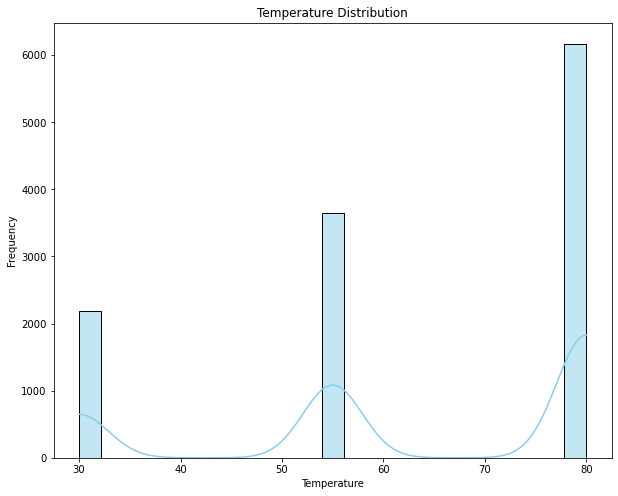

In [19]:
plt.figure(figsize=(10, 8))

selected_palette = random.choice(available_palettes)
sns.set_palette(selected_palette)

sns.histplot(data=cleaned_data, x='temperature', kde=True, color='skyblue')

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.show()

In [20]:
cleaned_data['temperature'].value_counts()

80    6171
55    3652
30    2184
Name: temperature, dtype: int64

The histogram checks out as there are only 3 different values of temperature. 

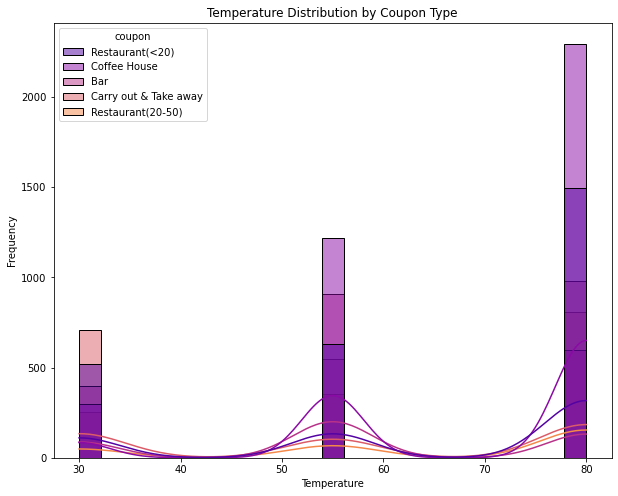

In [21]:
plt.figure(figsize=(10, 8))

selected_palette = random.choice(available_palettes)
sns.set_palette(selected_palette)

sns.histplot(data=cleaned_data, x='temperature', hue='coupon', kde=True)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Coupon Type')

plt.show()

The histogram above shows the distribution of temperature classified by coupon type. It is interesting that during warmer temperatures, more coffee house coupons were offered. During colder temperatures, more carry out & take away coupons were offered.

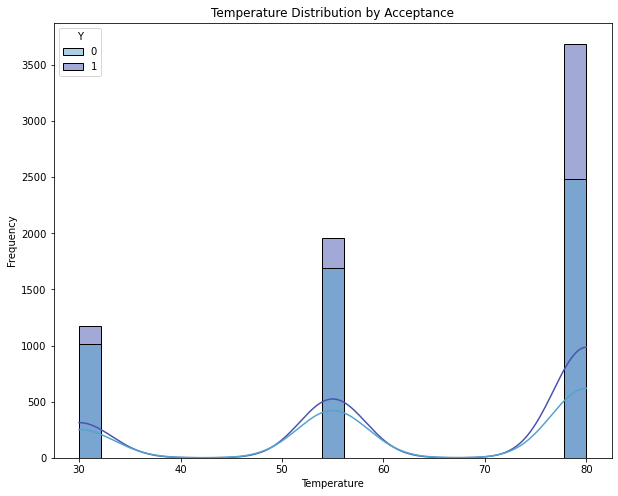

In [22]:
plt.figure(figsize=(10, 8))

selected_palette = random.choice(available_palettes)
sns.set_palette(selected_palette)

sns.histplot(data=cleaned_data, x='temperature', hue='Y', kde=True)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Acceptance')

plt.show()

The histogram above shows the distribution of temperature classified by whether the coupon was accepted. The customer was more likely to accept coupons during hotter temperatures than colder temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
bar_data = cleaned_data.query('coupon == "Bar"')
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,8,8,0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,8,8,0,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,0,8,8,0,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,8,3,3,0,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,8,3,3,0,1,0,0,1,0,0


**Method to make a bar graph representing the Acceptance Ratio for a Filtered Dataframe**

In [24]:
def plotAcceptanceRatioBarGraph(data, coupon_type, title):
    counts_data = data['Y'].value_counts(normalize=True).reset_index()
    counts_data.columns = ['Acceptance', 'Ratio']
    
    selected_palette = random.choice(available_palettes)
    sns.set_palette(selected_palette)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=counts_data, x='Acceptance', y='Ratio')
    plt.title(coupon_type + ' Coupon Acceptance Ratio for ' + title)
    plt.xlabel('Acceptance (0 for No, 1 for Yes)')
    plt.ylabel('Ratio')
    plt.show()

2. What proportion of bar coupons were accepted?

In [25]:
# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
bar_data['Y'].mean()

0.4118572927597062

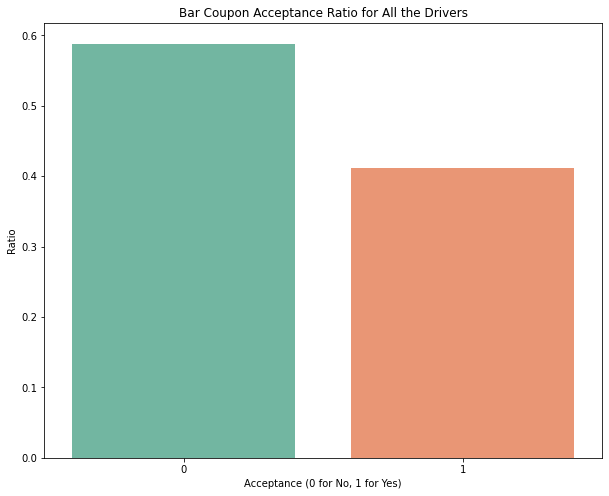

In [26]:
plotAcceptanceRatioBarGraph(bar_data, 'Bar', 'All the Drivers')

The proportion of the total Bar coupon observations that had people choose to accept the coupon was **0.412**. 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
condition = bar_data['Bar'] <= 3

A = bar_data[condition] # df for those who went to a bar 3 or fewer times a month
B = bar_data[~condition] # df for those who went to a bar more than 3 times

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for those who went to a bar 3 or fewer times a month:", A_acceptance)
print("Acceptance rate for those who went to a bar more than 3 times a month:", B_acceptance)

Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37244600116754234
Acceptance rate for those who went to a bar more than 3 times a month: 0.7616580310880829


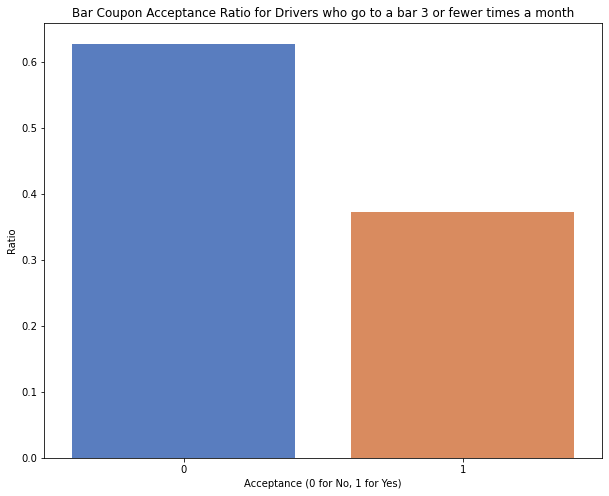

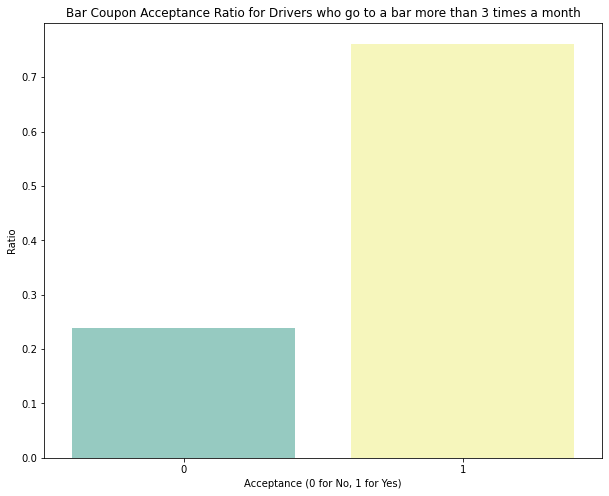

In [28]:
plotAcceptanceRatioBarGraph(A, 'Bar', 'Drivers who go to a bar 3 or fewer times a month')
plotAcceptanceRatioBarGraph(B, 'Bar', 'Drivers who go to a bar more than 3 times a month')

People who went to the bar more than 3 times a month had an acceptance rate for selecting the coupon at 76% while people who went to the bar 3 times or less in a month had an acceptance rate for selecting the coupon at 37%. People who went out to the bar more than 3 times a month were more likely to accept the bar coupon. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
condition = (bar_data['Bar'] >= 2) & (bar_data['age'] > 25)

A = bar_data[condition] # df for those who go to the bar more than once and are over 25
B = bar_data[~condition] # df for others

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for drivers who go to a bar more than once a month and are over 25:", A_acceptance)
print("Acceptance rate for all other drivers:", B_acceptance)

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.6898263027295285
Acceptance rate for all other drivers: 0.3373253493013972


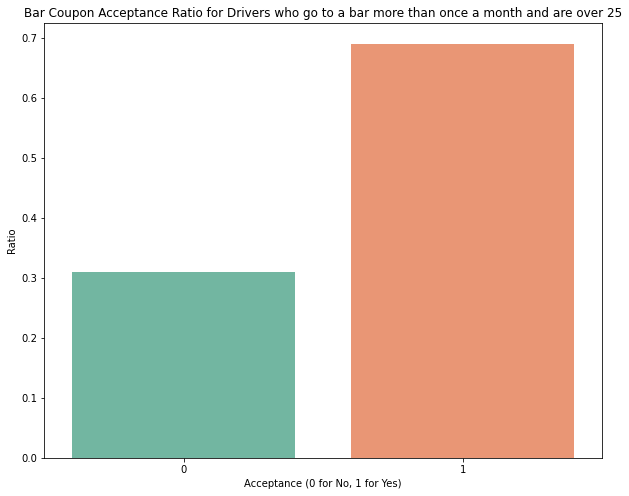

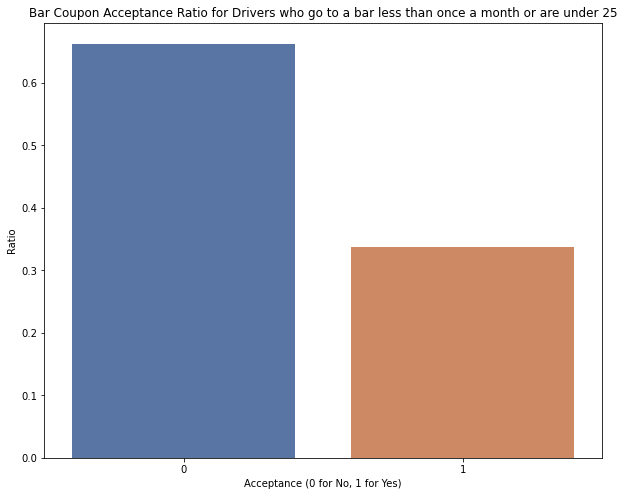

In [30]:
plotAcceptanceRatioBarGraph(A, 'Bar', 'Drivers who go to a bar more than once a month and are over 25')
plotAcceptanceRatioBarGraph(B, 'Bar', 'Drivers who go to a bar less than once a month or are under 25')

There is a higher acceptance rate for drivers who go to a bar more than once a month and are over 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [31]:
condition = (bar_data['Bar'] >= 2) & ~(bar_data['passanger'] == 'Kid(s)') & ~(bar_data['occupation'] == 'Farming Fishing & Forestry')

A = bar_data[condition] # df for those who go to a bar more than once a month, have no kid passengers, and have an occupation other than Farming Fishing & Forestry
B = bar_data[~condition] # df for others

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for drivers who go to a bar more than once a month, have no kid passengers, and have an occupation other than Farming Fishing & Forestry:", A_acceptance)
print("Acceptance rate for all other drivers:", B_acceptance)

Acceptance rate for drivers who go to a bar more than once a month, have no kid passengers, and have an occupation other than Farming Fishing & Forestry: 0.7094339622641509
Acceptance rate for all other drivers: 0.29723837209302323


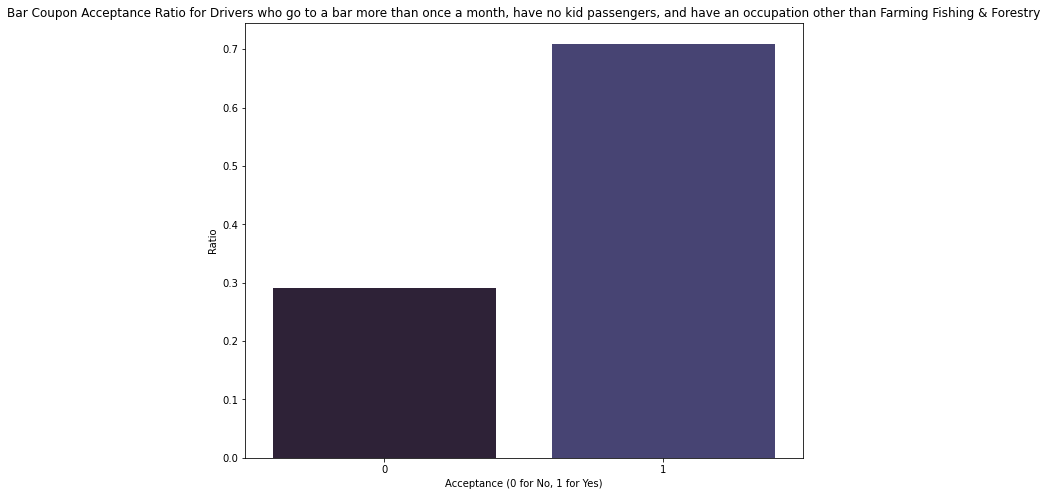

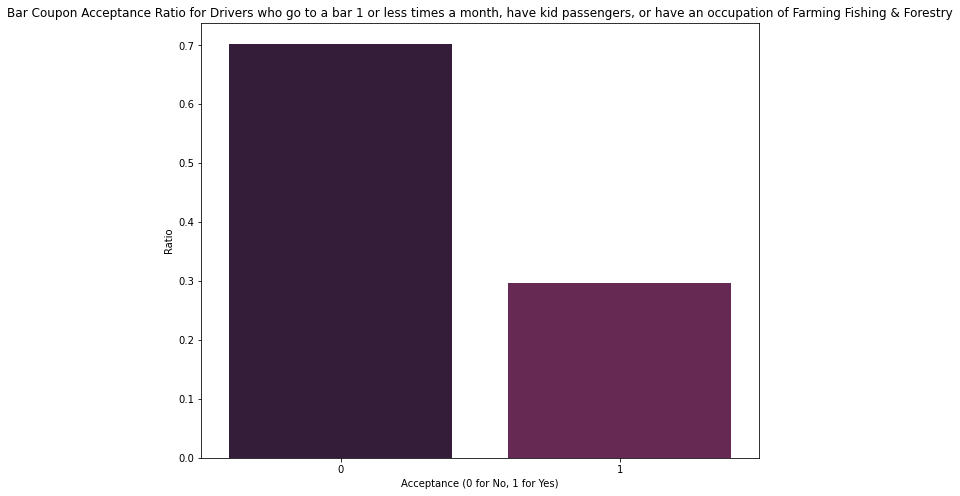

In [32]:
plotAcceptanceRatioBarGraph(A, 'Bar', 'Drivers who go to a bar more than once a month, have no kid passengers, and have an occupation other than Farming Fishing & Forestry')
plotAcceptanceRatioBarGraph(B, 'Bar', 'Drivers who go to a bar 1 or less times a month, have kid passengers, or have an occupation of Farming Fishing & Forestry')

There is a higher acceptance rate for drivers who go to a bar more than once a month, have no kid passengers, and have an occupation other than Farming Fishing & Forestry

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [33]:
A = bar_data[(bar_data['Bar'] >= 2) & ~(bar_data['passanger'] == 'Kid(s)') & ~(bar_data['maritalStatus'] == 'Widowed')] # df for drivers who go to a bar more than once a month, have no kid passengers, and were not widowed
B = bar_data[(bar_data['Bar'] >= 2) & (bar_data['age'] < 30)] # df for drivers who go to a bar more than once a month and were under the age of 30
C = bar_data[(bar_data['RestaurantLessThan20'] > 4) & (bar_data['income'] < 50000)] # df for drivers who went to cheap restaurants more than 4 times a month and had income < $50k

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()
C_acceptance = C['Y'].mean()

print("Acceptance rate for drivers who go to a bar more than once a month, have no kid passengers, and are not widowed:", A_acceptance)
print("Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30:", B_acceptance)
print("Acceptance rate for drivers who went to cheap restaurants more than 4 times a month and had income < $50k:", C_acceptance)

Acceptance rate for drivers who go to a bar more than once a month, have no kid passengers, and are not widowed: 0.7094339622641509
Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: 0.7195121951219512
Acceptance rate for drivers who went to cheap restaurants more than 4 times a month and had income < $50k: 0.45645645645645644


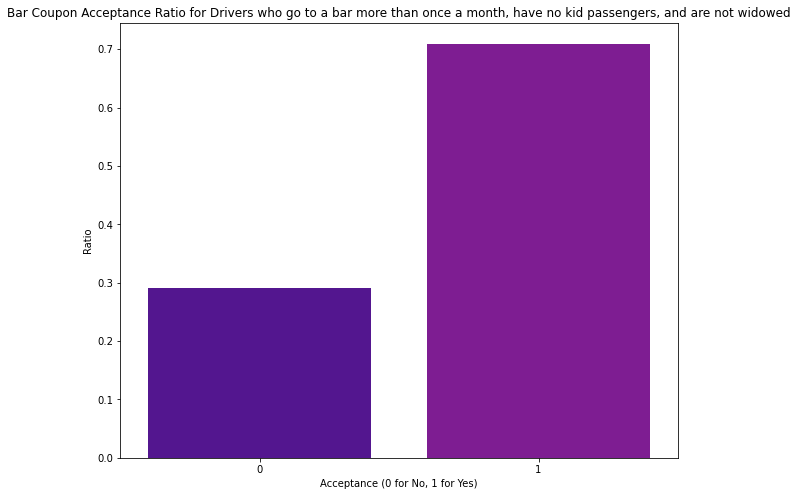

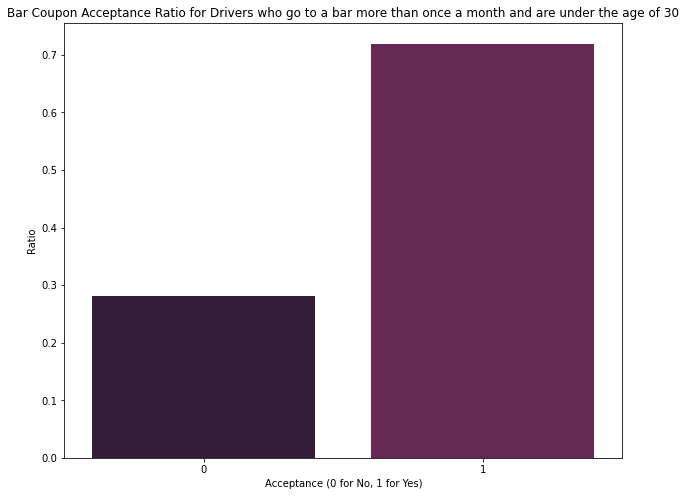

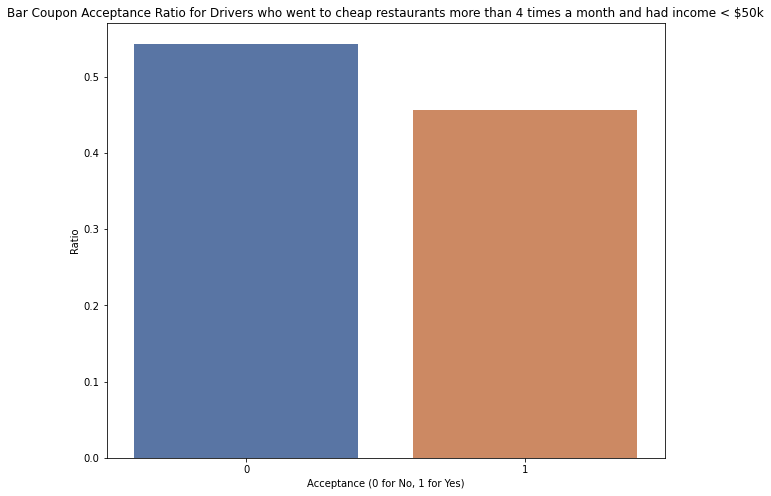

In [34]:
plotAcceptanceRatioBarGraph(A, 'Bar', 'Drivers who go to a bar more than once a month, have no kid passengers, and are not widowed')
plotAcceptanceRatioBarGraph(B, 'Bar', 'Drivers who go to a bar more than once a month and are under the age of 30')
plotAcceptanceRatioBarGraph(C, 'Bar', 'Drivers who went to cheap restaurants more than 4 times a month and had income < $50k')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the provided acceptance rate observations, it can be hypothesized that drivers who go to a bar frequently (more than 3 times), are between the ages of 25 to 30, or who go to bars more than once a month and do not have child passengers are very likely to accept the bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Create a new `DataFrame` that contains just the Coffee House coupons.**

In [35]:
coffee_data = cleaned_data.query('coupon == "Coffee House"')
coffee_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,0,8,8,0,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,0,8,8,0,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,0,8,8,0,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,0,8,8,0,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,0,8,8,0,1,0,0,0,1,0


**What proportion of bar coupons were accepted?**

In [36]:
# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
coffee_data['Y'].mean()

0.495668154371226

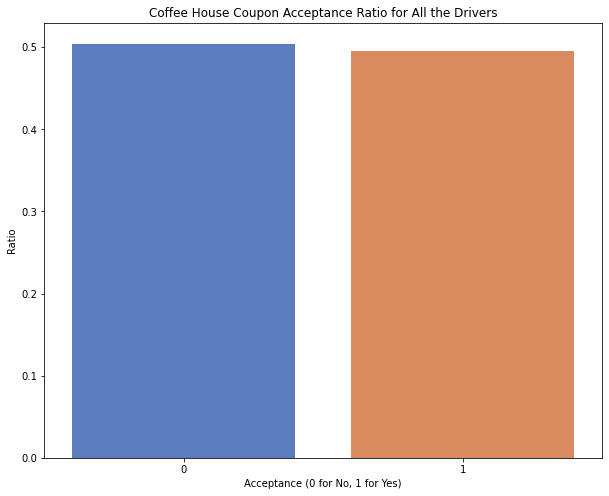

In [37]:
plotAcceptanceRatioBarGraph(coffee_data, 'Coffee House', 'All the Drivers')

The proportion of the total Bar coupon observations that had people choose to accept the coupon was **0.50**. 

**Compare the acceptance rate between those who went to a Coffee House 1 or fewer times a month to those who went more.**

In [38]:
condition = coffee_data['CoffeeHouse'] <= 1

A = coffee_data[condition] # df for those who went to a Coffee House 1 or fewer times a month
B = coffee_data[~condition] # df for those who went to a Coffee House more than 1 time

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for those who went to a Coffee House 1 or fewer times a month:", A_acceptance)
print("Acceptance rate for those who went to a Coffee House more than 1 time a month:", B_acceptance)

Acceptance rate for those who went to a Coffee House 1 or fewer times a month: 0.3393316195372751
Acceptance rate for those who went to a Coffee House more than 1 time a month: 0.6587982832618026


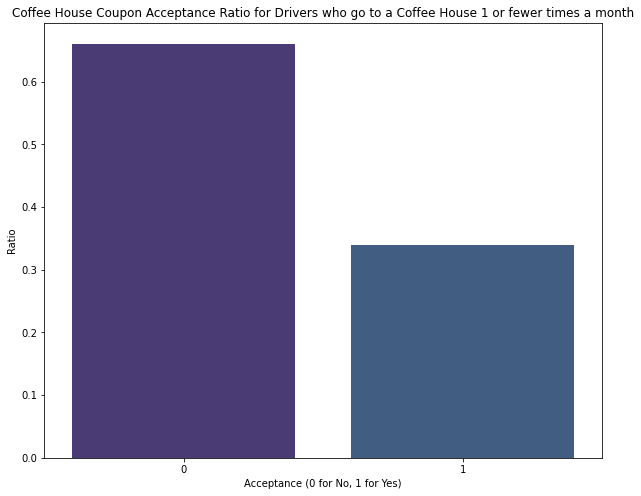

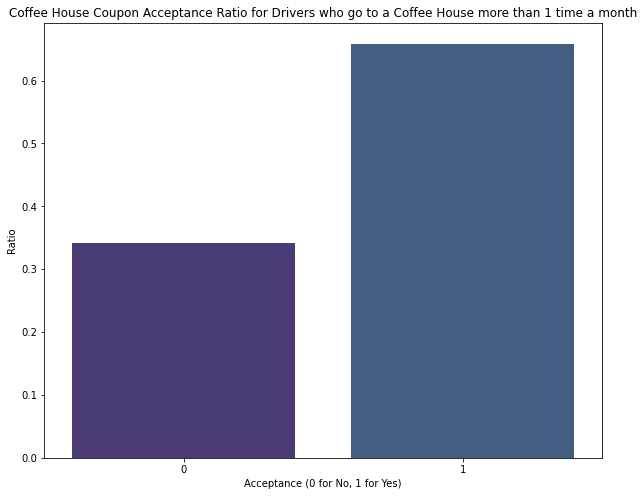

In [39]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to a Coffee House 1 or fewer times a month')
plotAcceptanceRatioBarGraph(B, 'Coffee House', 'Drivers who go to a Coffee House more than 1 time a month')

There is a higher acceptance rate for drivers who go to a Coffee House more than once a month.

**Method to make a bar graph distribution of a variable classified by acceptance**

In [40]:
def plotDistributionBarByAcceptance(data, var_type):
    plt.figure(figsize=(10, 8))

    selected_palette = random.choice(available_palettes)
    sns.set_palette(selected_palette)

    sns.countplot(data=data, x=var_type, hue='Y') 

    plt.xlabel(var_type)
    plt.ylabel('Count')
    plt.title(var_type + ' Distribution classified by Acceptance')

    plt.xticks(rotation=45)

    plt.show()

**Explore distribution of times classified by Acceptences**

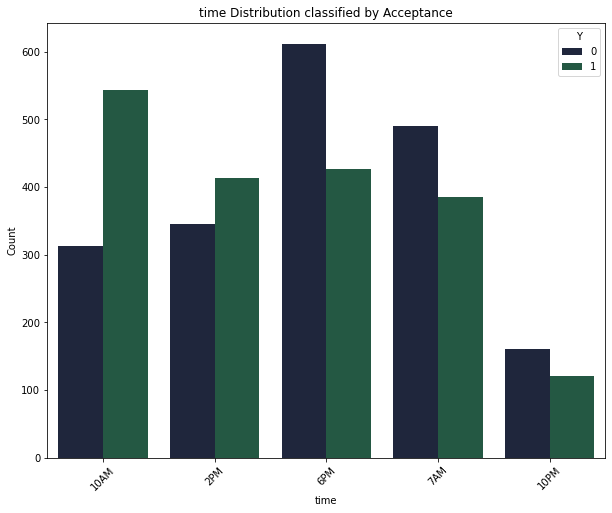

In [41]:
plotDistributionBarByAcceptance(coffee_data, 'time')

From the bar graph above, it is clear that the most acceptances of the coupon occurred at 10 AM and 2 PM. 

**Explore distribution of gender classified by Acceptences**

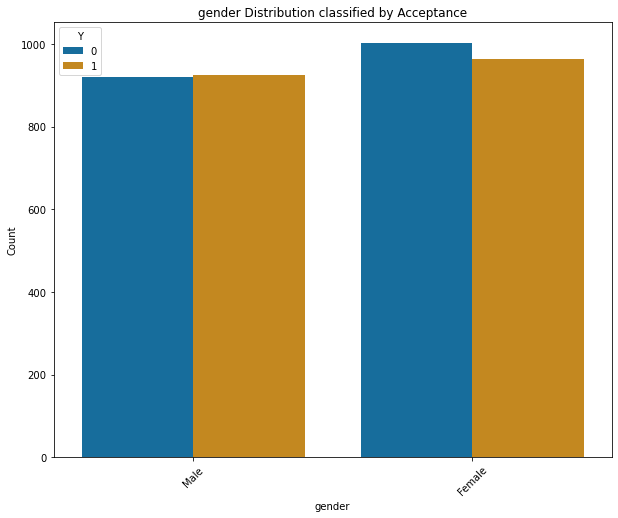

In [42]:
plotDistributionBarByAcceptance(coffee_data, 'gender')

Males and Females both equally accepted and rejected the Coffee House coupon. 

**Explore distribution of weather classified by Acceptences**

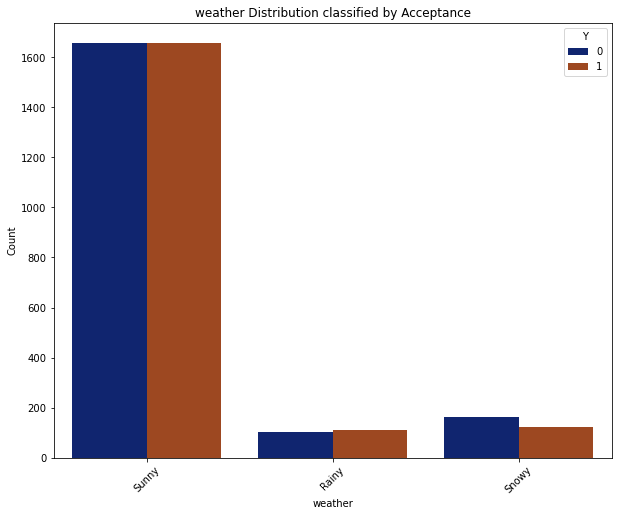

In [43]:
plotDistributionBarByAcceptance(coffee_data, 'weather')

Drivers equally accepted and rejected the Coffee House coupon during the different weather conditons. 

**Explore distribution of age classified by Acceptences**

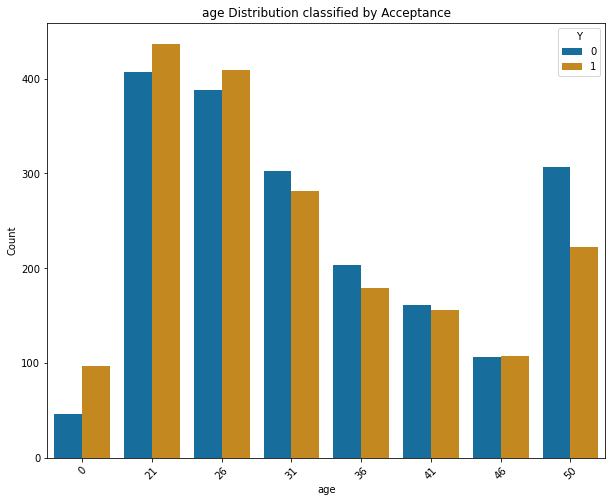

In [44]:
plotDistributionBarByAcceptance(coffee_data, 'age')

Drivers ages 0 to 30 mostly had the most acceptances of the Coffee House coupon. 

**Compare the acceptance rate between drivers who go to a Coffee House more than once a month when it is sunny to the all others.**

In [45]:
condition = (coffee_data['CoffeeHouse'] >= 2) & (coffee_data['weather'] == 'Sunny')

A = coffee_data[condition] # df for those who go to the coffee house more than once a month when the weather is sunny
B = coffee_data[~condition] # df for others

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for drivers who go to a Coffee House more than once a month when the weather is sunny:", A_acceptance)
print("Acceptance rate for all other drivers:", B_acceptance)

Acceptance rate for drivers who go to a Coffee House more than once a month when the weather is sunny: 0.6736453201970444
Acceptance rate for all other drivers: 0.36338672768878716


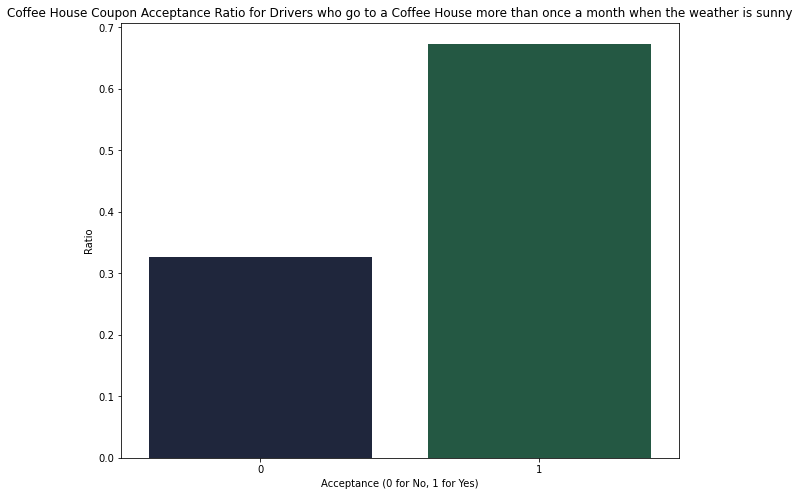

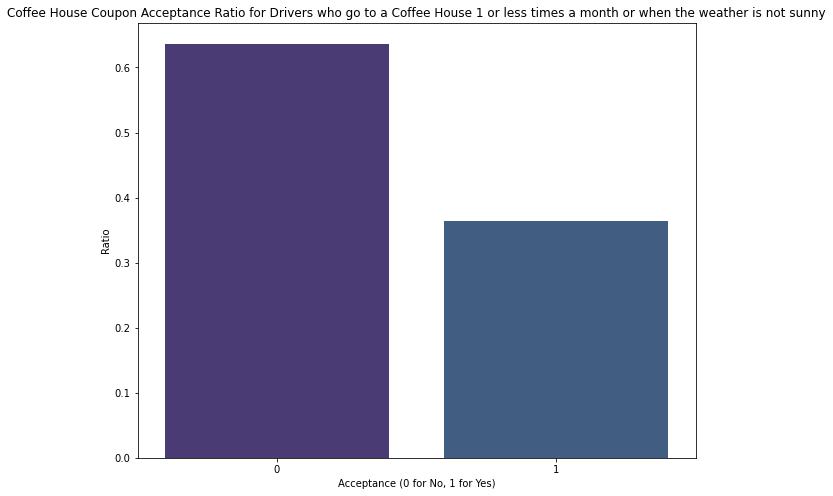

In [46]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to a Coffee House more than once a month when the weather is sunny')
plotAcceptanceRatioBarGraph(B, 'Coffee House', 'Drivers who go to a Coffee House 1 or less times a month or when the weather is not sunny')

There is a higher acceptance rate for drivers who go to a Coffee House more than once a month and the weather is sunny.

**Compare the acceptance rate of male and female drivers between ages 18-30 who go to a Coffee House more than once a month.**

In [47]:
A = coffee_data[(coffee_data['CoffeeHouse'] >= 2) & (coffee_data['gender'] == 'Female') & (coffee_data['age'] >= 18) & (coffee_data['age'] <= 30)] # df for those who go to the coffee house more than once and are females between 18 to 30
B = coffee_data[(coffee_data['CoffeeHouse'] >= 2) & (coffee_data['gender'] == 'Male') & (coffee_data['age'] >= 18) & (coffee_data['age'] <= 30)] # df for those who go to the coffee house more than once and are males between 18 to 30

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30:", A_acceptance)
print("Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30:", B_acceptance)

Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30: 0.733502538071066
Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30: 0.6289592760180995


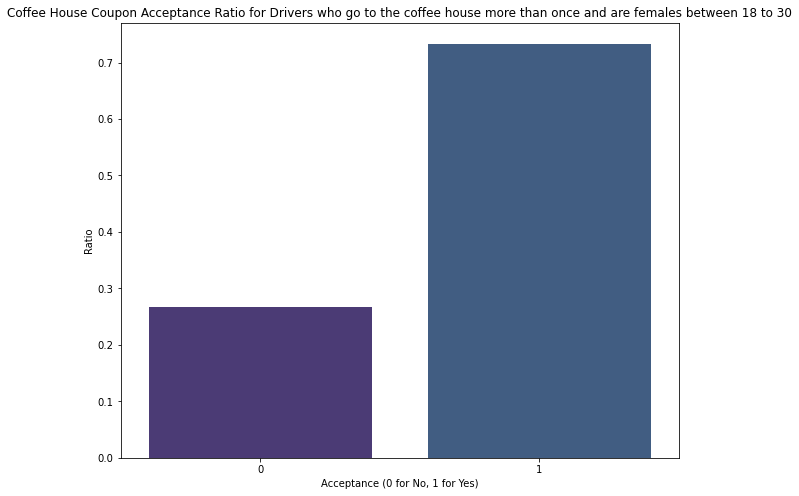

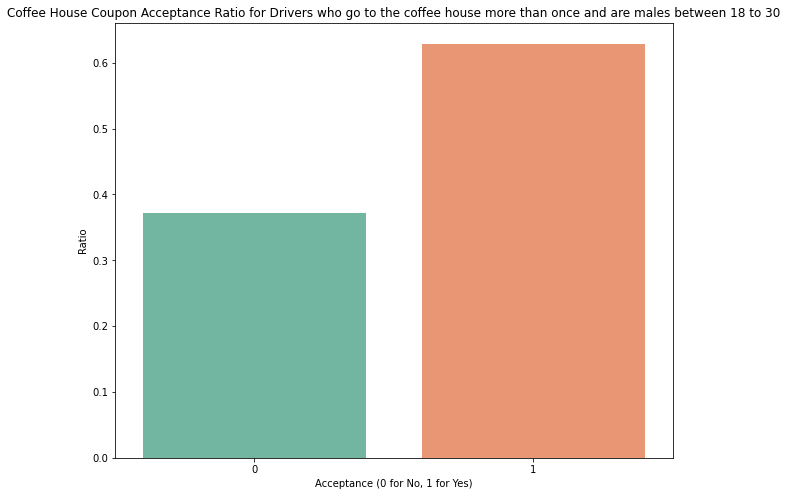

In [48]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to the coffee house more than once and are females between 18 to 30')
plotAcceptanceRatioBarGraph(B, 'Coffee House', 'Drivers who go to the coffee house more than once and are males between 18 to 30')

Males and Females between ages 18 to 30 are both very likely to accept the coffee house coupon.

**Compare the acceptance rate of male and female drivers between ages 18-30 who go to a Coffee House more than once a month at 10AM or 2PM.**

In [49]:
condition1 = (coffee_data['CoffeeHouse'] >= 2) & (coffee_data['gender'] == 'Female') & (coffee_data['age'] >= 18) & (coffee_data['age'] <= 30) & ((coffee_data['time'] == '10AM') | (coffee_data['time'] == '2PM'))
condition2 = (coffee_data['CoffeeHouse'] >= 2) & (coffee_data['gender'] == 'Male') & (coffee_data['age'] >= 18) & (coffee_data['age'] <= 30) & ((coffee_data['time'] == '10AM') | (coffee_data['time'] == '2PM'))

A = coffee_data[condition1] # df for those who go to the coffee house more than once and are females between 18 to 30 at 10 AM or 2 PM
B = coffee_data[condition2] # df for those who go to the coffee house more than once and are males between 18 to 30 at 10 AM or 2 PM

# can use mean to calculate acceptance rate since values of Y column are 0's and 1's
A_acceptance = A['Y'].mean()
B_acceptance = B['Y'].mean()

print("Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30 at 10 AM or 2 PM:", A_acceptance)
print("Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30 at 10 AM or 2 PM:", B_acceptance)

Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30 at 10 AM or 2 PM: 0.8839779005524862
Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30 at 10 AM or 2 PM: 0.7045454545454546


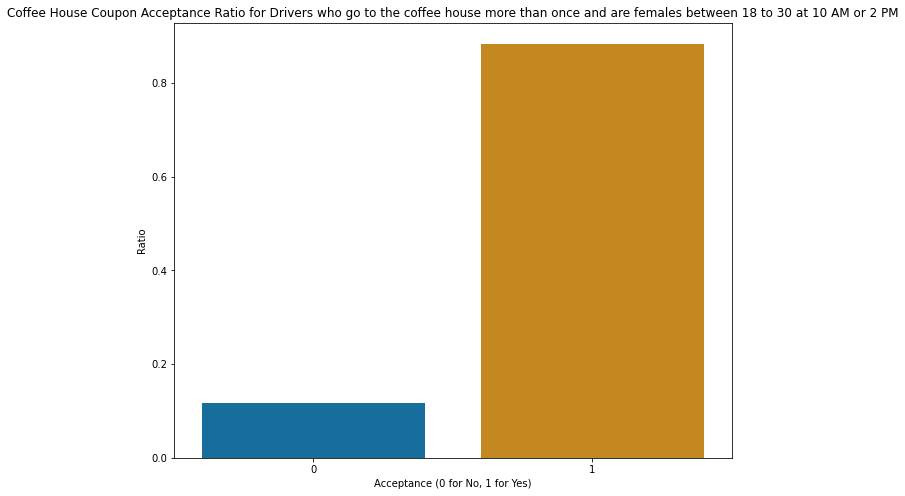

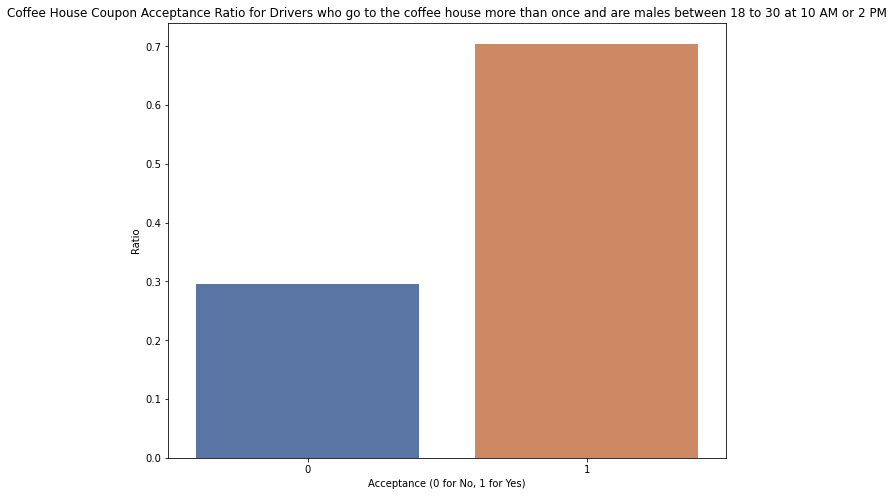

In [50]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to the coffee house more than once and are females between 18 to 30 at 10 AM or 2 PM')
plotAcceptanceRatioBarGraph(B, 'Coffee House', 'Drivers who go to the coffee house more than once and are males between 18 to 30 at 10 AM or 2 PM')

Males and Females between ages 18 to 30 are both very likely to accept the coffee house coupon at 10 AM or 2 PM.

**Compare the acceptance rate of male and female drivers between ages 18-30 who go to a Coffee House more than once a month at 10AM and 2PM when the weather is sunny.**

In [51]:
condition1WSunny = (condition1) & (coffee_data['weather'] == 'Sunny')
A = coffee_data[condition1WSunny] # df for those who go to the coffee house more than once and are females between 18 to 30 at 10AM or 2PM when weather is sunny
A_acceptance = A['Y'].mean()
print("Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30 at 10AM or 2PM when weather is sunny:", A_acceptance)

Acceptance rate for drivers who go to the coffee house more than once and are females between 18 to 30 at 10AM or 2PM when weather is sunny: 0.877906976744186


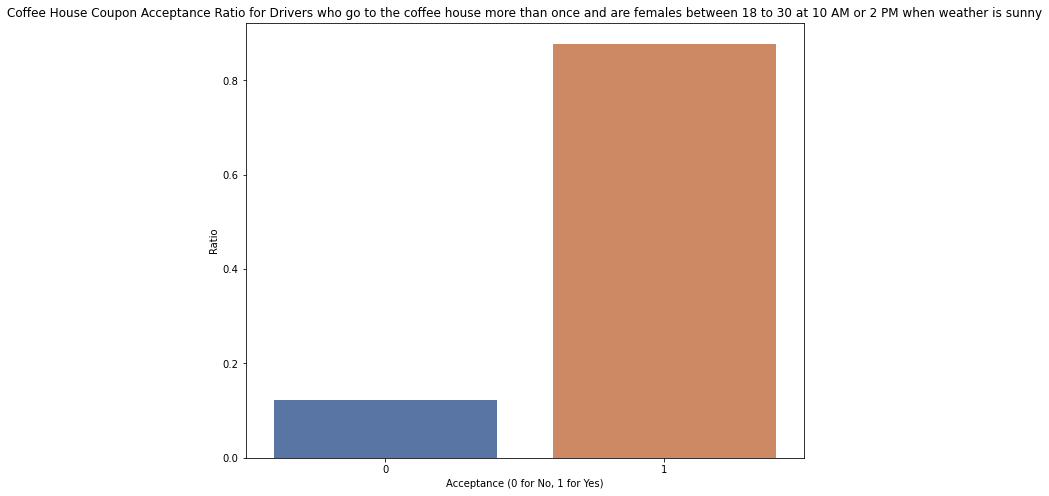

In [52]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to the coffee house more than once and are females between 18 to 30 at 10 AM or 2 PM when weather is sunny')

In [53]:
condition2WSunny = (condition2) & (coffee_data['weather'] == 'Sunny')
A = coffee_data[condition2WSunny] # df for those who go to the coffee house more than once and are males between 18 to 30 at 10AM or 2PM when weather is sunny
A_acceptance = A['Y'].mean()
print("Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30 at 10AM or 2PM when weather is sunny:", A_acceptance)

Acceptance rate for drivers who go to the coffee house more than once and are males between 18 to 30 at 10AM or 2PM when weather is sunny: 0.7212121212121212


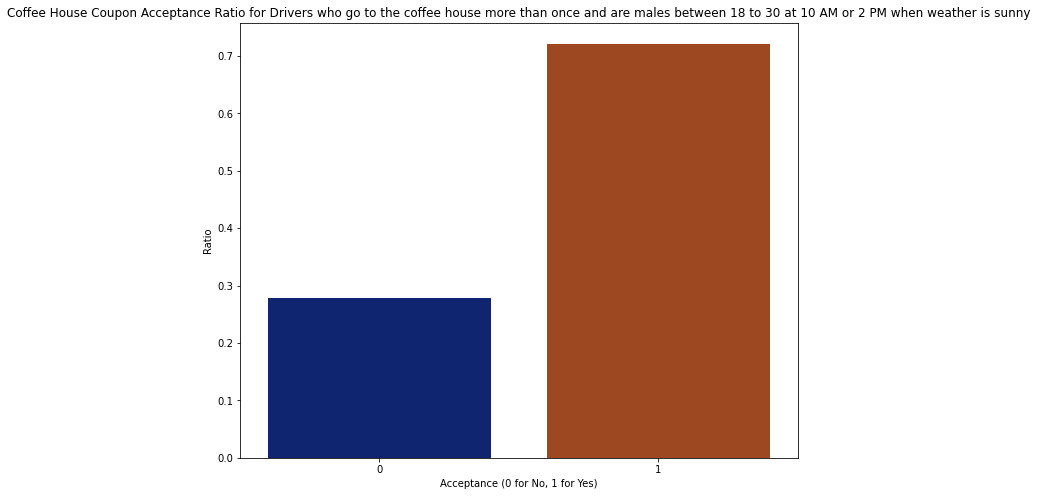

In [54]:
plotAcceptanceRatioBarGraph(A, 'Coffee House', 'Drivers who go to the coffee house more than once and are males between 18 to 30 at 10 AM or 2 PM when weather is sunny')

**Conclusion**

Based on these observations, what do you hypothesize about drivers who accepted the Coffee House coupons?

Based on the provided acceptance rate observations, it can be hypothesized that drivers (both male and female) between the ages of 18 to 30 who go to the coffee house more than once a month are highly likely to accept the Coffee House coupon at 10 AM and 2 PM when the weather is sunny. 